# Task : Car Price Prediction with ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"F:\Downloads\quikr_car - quikr_car.csv")

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


### DATA CLEANING

In [6]:
#Copy of dataset created

car_backup = df.copy()

- 'year' has many non-year values

In [7]:
df = df[df['year'].str.isnumeric()]

- year is in object. Changed to integer

In [8]:
df['year'] = df['year'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


- Price has Ask for Price

In [10]:
df = df[df['Price']!='Ask For Price']

- Price has commas in its prices and is in object

In [11]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

- kms_driven has object values with kms at last.

In [12]:
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',','')

- It has nan values and two rows have 'Petrol' in them

In [13]:
df = df[df['kms_driven'].str.isnumeric()]

In [14]:
df['kms_driven'] = df['kms_driven'].astype(int)

- fuel_type has nan values

In [15]:
df = df[~df['fuel_type'].isna()]

In [16]:
df.shape

(816, 6)

- name and company had spammed data, but with the previous cleaning, those rows got removed

- Company does not need any cleaning now.Changing car names.Keeping only the first three words

In [17]:
df['name'] = df['name'].str.split().str.slice(0,3).str.join(' ')

- Resetting the index of the final cleaned data

In [18]:
df = df.reset_index(drop=True)

In [19]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [21]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [22]:
df = df[df['Price']<6000000].reset_index(drop=True)

In [23]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [24]:
df.to_csv('Cleaned Car.csv')

# EDA

- Fuel type vs price

In [25]:
fuel = df['fuel_type']
price = df['Price']

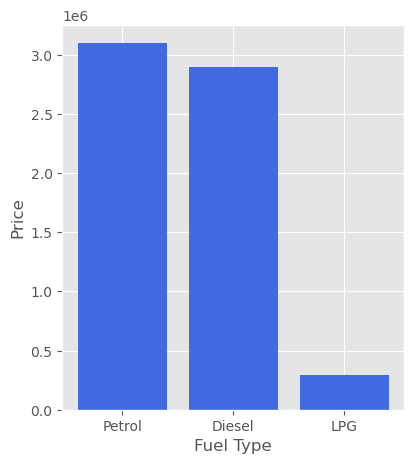

In [26]:
plt.style.use('ggplot')

# Create a figure
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.bar(fuel, price, color='royalblue')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
# Show the plots
plt.show()

In [27]:
# Checking relationship of Company with Price

In [28]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

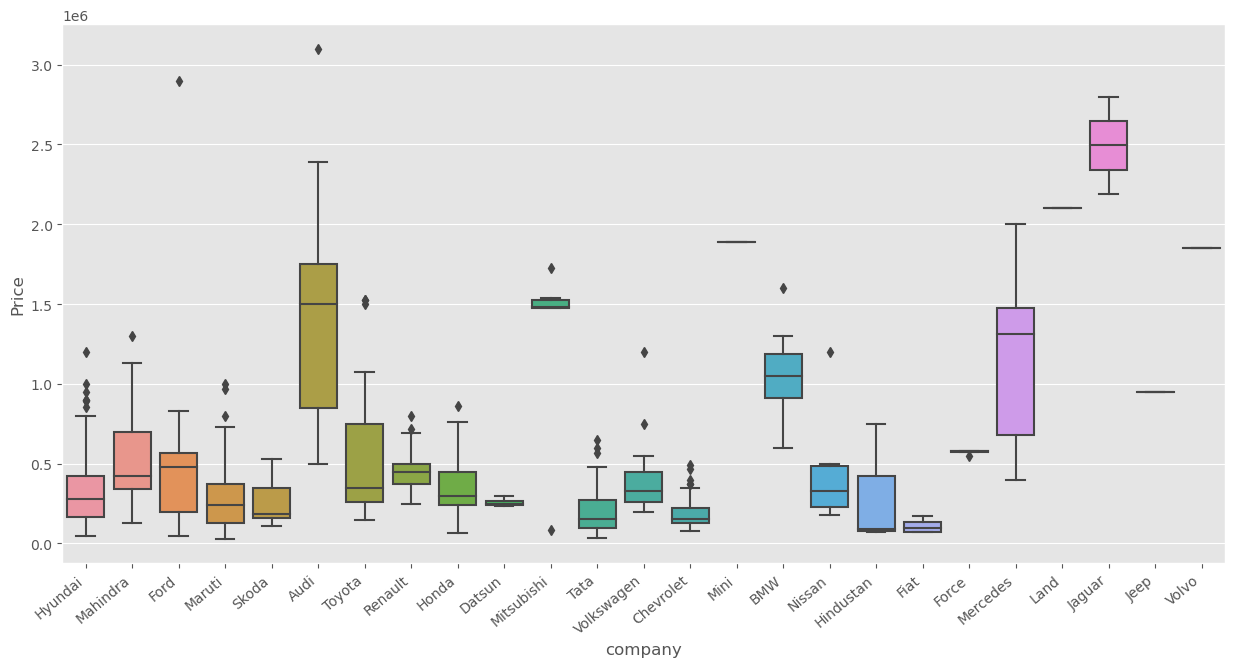

In [29]:
plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='company',y='Price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [30]:
#Checking relationship of kms_driven  with Price

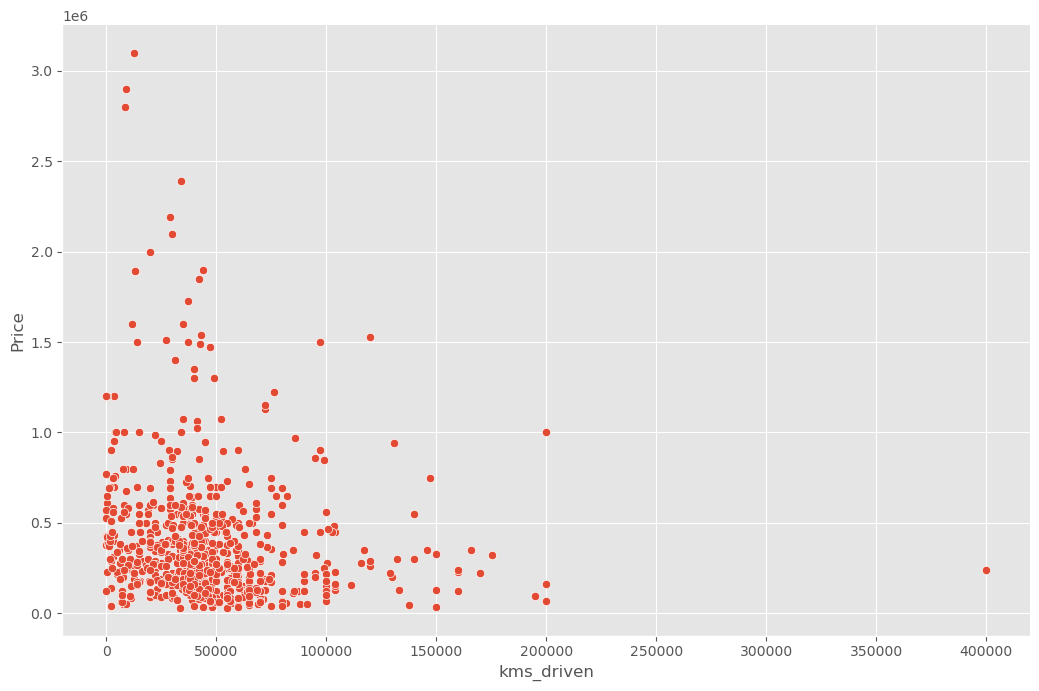

In [31]:
sns.relplot(x = 'kms_driven',y = 'Price',data = df, height=7, aspect=1.5)

In [32]:
#Checking relationship of Year with Price

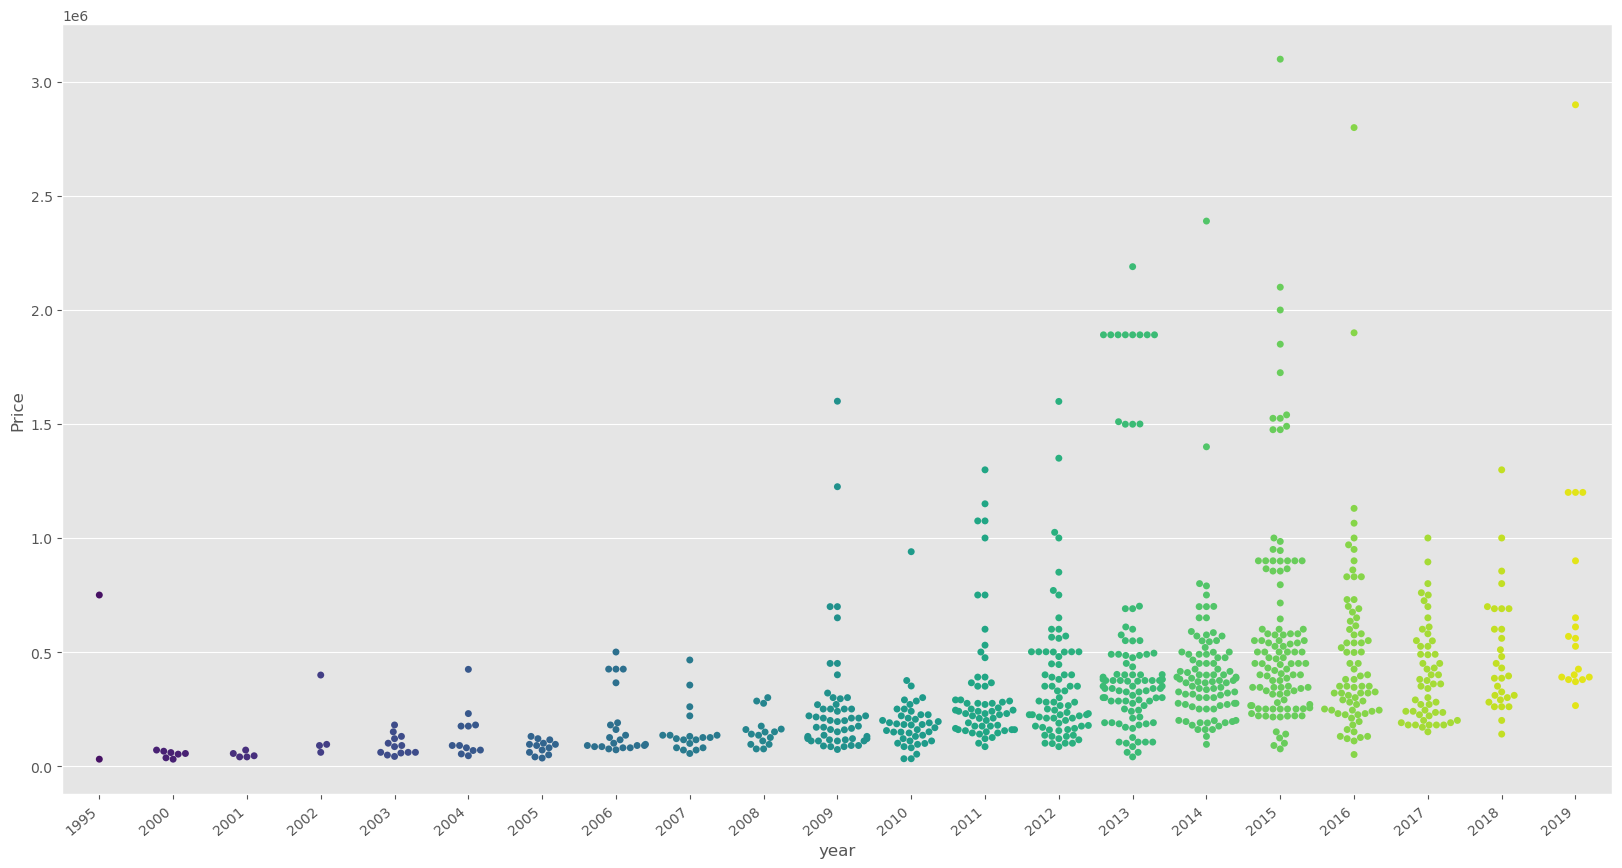

In [33]:
plt.subplots(figsize = (20,10))
ax = sns.swarmplot(x ='year',y ='Price',palette="viridis" ,data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha ='right')
plt.show()

In [34]:
#Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

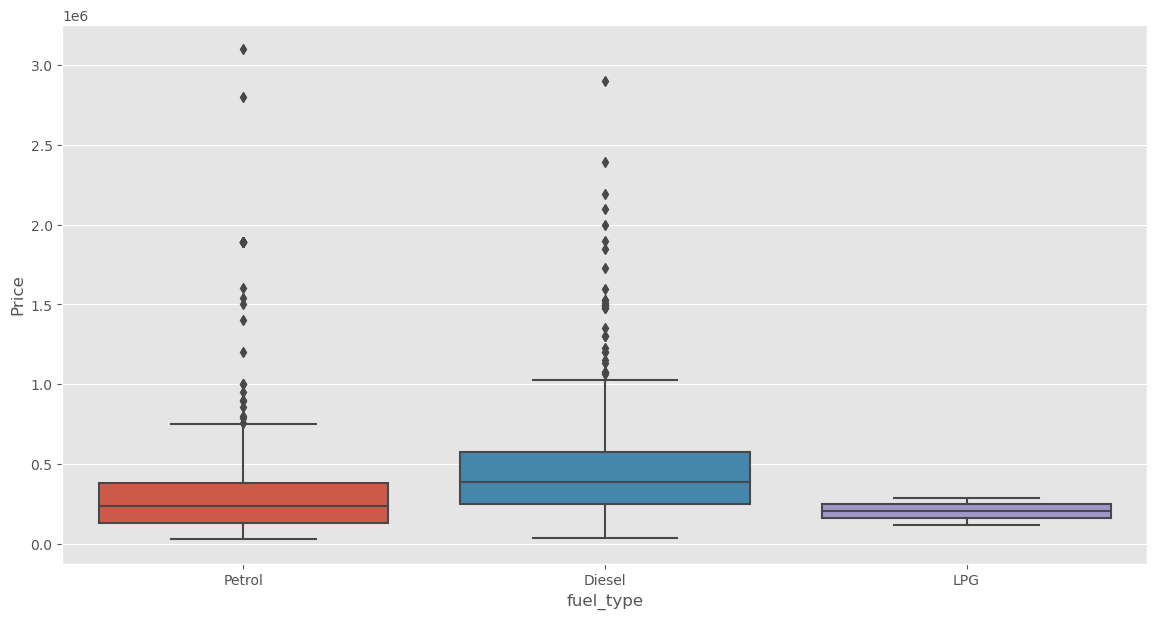

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data = df)

In [36]:
#Relationship of Price with FuelType, Year and Company mixed

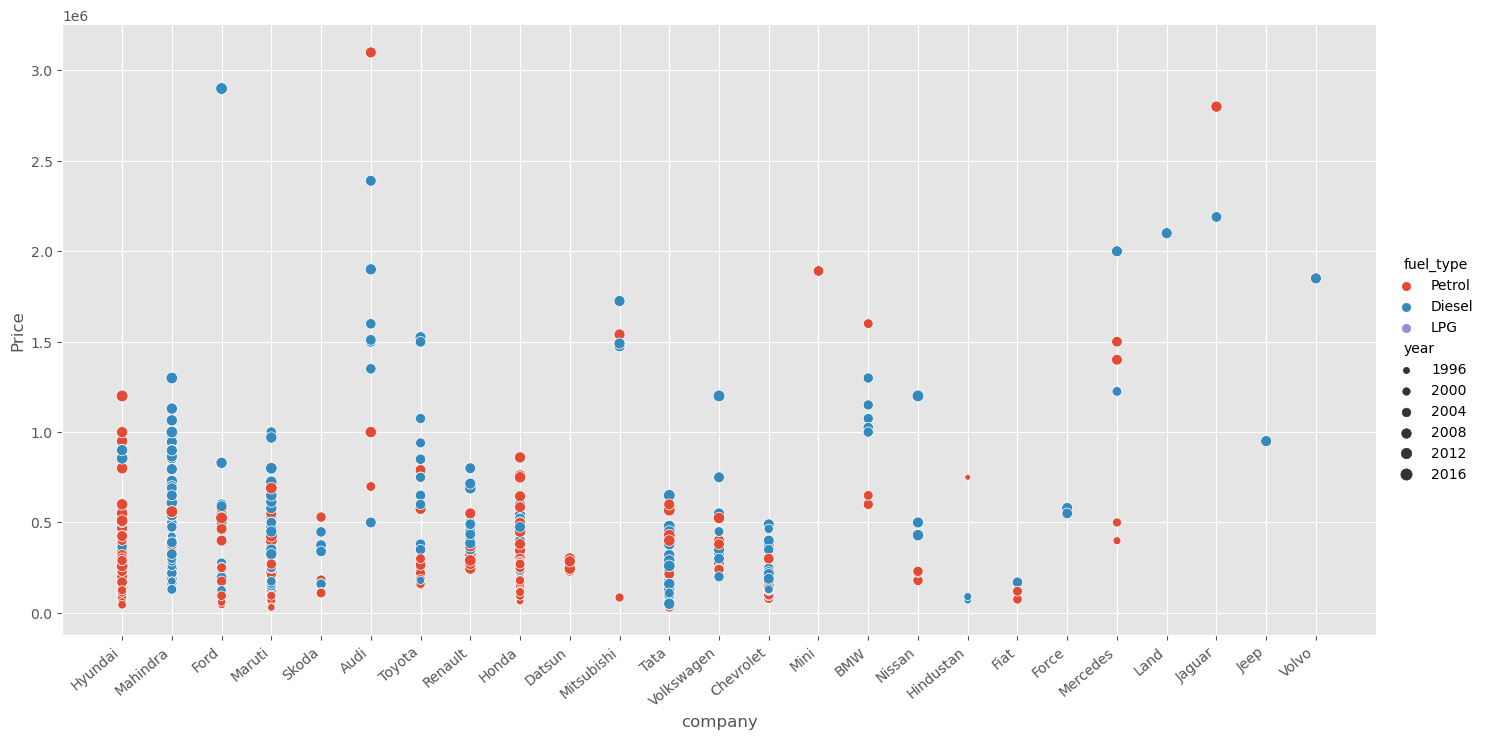

In [37]:
ax = sns.relplot(x = 'company',y = 'Price',data = df,hue = 'fuel_type',size = 'year',height = 7,aspect = 2)
ax.set_xticklabels(rotation = 40, ha = 'right')

### Extracting Training Data

In [38]:
X = df[['name','company','year','kms_driven','fuel_type']]
Y = df['Price']

In [39]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [40]:
Y.shape

(815,)

### Train - Test Split

In [41]:
X = df.drop(columns='Price')
y = df['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Model Initialization , Model Training & Model Evaluation

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

- Creating an OneHotEncoder object to contain all the possible categories

In [44]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

- Creating a column transformer to transform categorical columns

In [45]:
column_trans = make_column_transformer((OneHotEncoder(categories= ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

# Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

- Making a pipeline

In [47]:
pipe = make_pipeline(column_trans,linreg)

In [48]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [49]:
y_pred = pipe.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 124865.81890486469
Mean Squared Error: 55937818507.795074
R² Score: 0.6790307895915338


### R2 Score

In [51]:
r_square = r2_score(y_test,y_pred)
r_square

0.6790307895915338

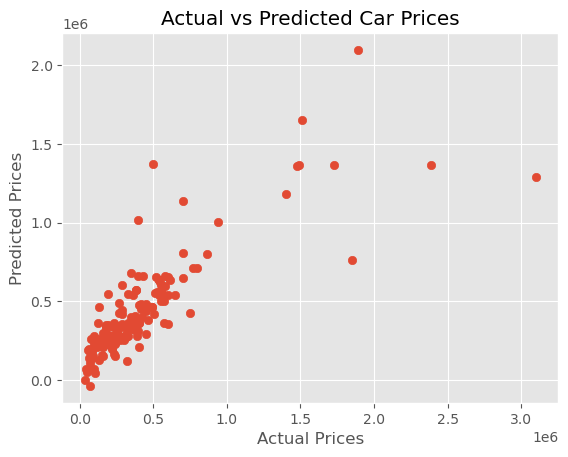

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [53]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state = i)
    linreg = LinearRegression()
    pipe = make_pipeline(column_trans,linreg)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [54]:
np.argmax(scores)

302

In [55]:
scores[np.argmax(scores)]

0.8991157554877304

In [56]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430301.37134528])

## The best model is found at a certain random state

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
linreg = LinearRegression()
pipe = make_pipeline(column_trans,linreg)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [58]:
import pickle

In [59]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [60]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

In [61]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese